<a href="https://colab.research.google.com/github/Frost0088/Econometrics-with-Python/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression**

A simple linear regression is a straightforward approach of predicting a quantitative dependent variable based on a single explanatory variable. It assumes that there is approximately a linear relationship between X and Y. Mathematically, tnis linear relationship can be written as:

                      𝑌 ≈ β1 + β2*𝑋                              (1.1)

In the model, β1 and B2 are unknown constants that represent the intercept and the slope of the linear model respectively.

#### **Interpretation of B1 and B2**

In the linear model (1.1), B1 (intercept) is the value that the dependent variable Y takes when X takes the value of 0.

B2 is the slope coefficient. It tells us by how much unit Y will change as X changes by one unit.

Consider the following hypothetical model:

                          sales = 4000 + 13*(advertisment_exp)

The above model tells us that there will be a sales of $4,000 when advertisemet expenditure is nil. And sales increases by 13 units for each dollar spent on advertisent.

B1 and B2 are unknows and we estimate them using data. The estimated model can be written as: y^ = b1^ + b2^*xi.

y_hat is a prediction of Y on the basis X = x.The ^ symbol is used to denote the estimated value of an unknown parameter.









### Estimation of the Coefficients

The question is how do we estimate the coefficients? We would want our prediction y_hat to be as close as possible to the actual Y. In other words, we would want to minimize the distance between what our model predicts for the dependent variable and its actual value.

The distance between the actual and the predicted value is called a residual. It is mathematically written as:

                            û = Y - ŷ
                            û = Y - (b1+b2*x)

We estimate B1 and B2 using the OLS (Ordinary Least Squares Method). In this method, we minimize the sum of squared residuals to obtain the coefficients that would produce a best fit line.

Let yi = b1 + b2*xi be the prediction of Y based on the ith value of X.
Then ui = y - yi is the ith residual.

Then the Residual Sum of Squares (RSS) is defined by:

                           RSS = u1^2 + u2^2 + ... + un^2
Or equivalently as:

  RSS = (y-b1^-b2*x_1)^2 + (y-b1^-b2^x_2)^2 + ... (y-b1^-b2^x_n)^2

The least squares approach chooses b1^ and b2^ in order to  inimize the RSS. Using calculus, it can be shown that the minimizers are:

The problem of estimating coefficients for the model is essentially the problem of finding the best fit line.



### Illustration of the problem of finding a best fit line

Suppose we have the following dataset.

## Simple Linear Regression in Python

It's time to code!

In [32]:
from google.colab import files
files.upload()

Saving weight-height.csv to weight-height (1).csv


{'weight-height (1).csv': b'"Gender","Height","Weight"\n"Male",73.847017017515,241.893563180437\n"Male",68.7819040458903,162.310472521300\n"Male",74.1101053917849,212.7408555565\n"Male",71.7309784033377,220.042470303077\n"Male",69.8817958611153,206.349800623871\n"Male",67.2530156878065,152.212155757083\n"Male",68.7850812516616,183.927888604031\n"Male",68.3485155115879,167.971110489509\n"Male",67.018949662883,175.92944039571\n"Male",63.4564939783664,156.399676387112\n"Male",71.1953822829745,186.604925560358\n"Male",71.6408051192206,213.741169489411\n"Male",64.7663291334055,167.127461073476\n"Male",69.2830700967204,189.446181386738\n"Male",69.2437322298112,186.434168021239\n"Male",67.6456197004212,172.186930058117\n"Male",72.4183166259878,196.028506330482\n"Male",63.974325721061,172.883470208780\n"Male",69.6400598997523,185.983957573130\n"Male",67.9360048540095,182.426648013226\n"Male",67.9150501938206,174.115929081393\n"Male",69.4394398680395,197.73142161472\n"Male",66.1491319608781,149

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [35]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [39]:
x = df["Height"]
x1 = sm.add_constant(x)
y = df["Weight"]

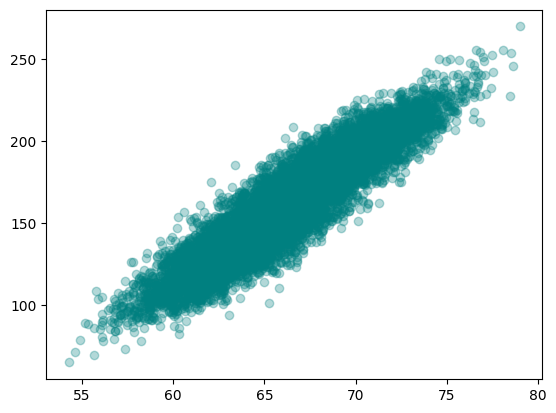

In [55]:
plt.scatter(x,y,alpha=0.3,c="teal")

In [40]:
model = sm.OLS(y,x1).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:17:52   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -350.7372      2.111   -166.109      0.000    -354.876    -346.598
Height         7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
b1 = -350.7372
b2 = 7.7173

In [49]:
reg_line = b1 + b2 * x

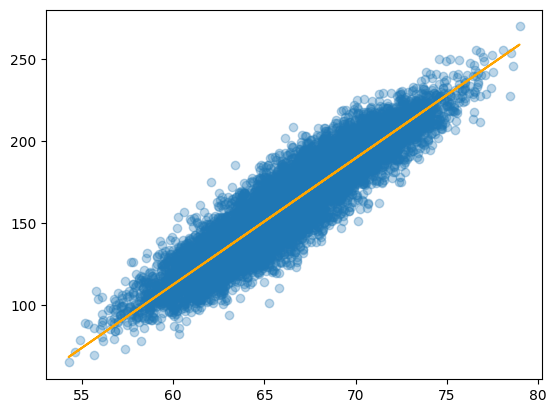

In [64]:
plt.scatter(x,y,alpha=0.3)
plt.plot(x,reg_line, c="orange")